In [1]:
import numpy as np
import pandas as pd

batting = pd.read_csv("batting_6agg.csv")

batting.head()

,player_id,start_year,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
0,castrra01,1999,207,466,40,99,17,0,18,53,0,0,56,116,15,2,1,6,7
1,wisede01,2000,147,296,41,60,13,5,9,30,12,1,14,48,1,2,2,1,1
2,jeterde01,1995,786,3130,605,1008,153,35,78,414,108,37,341,572,11,48,23,23,66
3,husonje01,1988,462,1143,153,266,42,9,6,85,43,14,136,148,7,3,28,10,29
4,izturce01,2001,658,2437,261,632,111,22,11,191,59,34,121,259,15,6,38,13,41


In [2]:
batting["start_year_agg"] = np.floor((batting["start_year"] - 1970)/5)
batting.head()

,player_id,start_year,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,start_year_agg
0,castrra01,1999,207,466,40,99,17,0,18,53,0,0,56,116,15,2,1,6,7,5
1,wisede01,2000,147,296,41,60,13,5,9,30,12,1,14,48,1,2,2,1,1,6
2,jeterde01,1995,786,3130,605,1008,153,35,78,414,108,37,341,572,11,48,23,23,66,5
3,husonje01,1988,462,1143,153,266,42,9,6,85,43,14,136,148,7,3,28,10,29,3
4,izturce01,2001,658,2437,261,632,111,22,11,191,59,34,121,259,15,6,38,13,41,6


In [3]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit(batting["start_year_agg"])
binarized = lb.transform(batting["start_year_agg"])
bin_df = pd.DataFrame(binarized)
bin_df = bin_df.rename(columns={0:"1970-74", 1: "1975-79", 2: "1980-84", 3: "1985-89", 4: "1990-94", 5: "1995-99", 6: "2000-04", 7: "2005-09"})
bin_df.head()
batting = pd.merge(batting, bin_df, how='left', left_index=True, right_index=True)
del batting["start_year"]
del batting["start_year_agg"]
batting.head()

,player_id,g,ab,r,h,double,triple,hr,rbi,sb,...,sf,g_idp,1970-74,1975-79,1980-84,1985-89,1990-94,1995-99,2000-04,2005-09
0,castrra01,207,466,40,99,17,0,18,53,0,...,6,7,0,0,0,0,0,1,0,0
1,wisede01,147,296,41,60,13,5,9,30,12,...,1,1,0,0,0,0,0,0,1,0
2,jeterde01,786,3130,605,1008,153,35,78,414,108,...,23,66,0,0,0,0,0,1,0,0
3,husonje01,462,1143,153,266,42,9,6,85,43,...,10,29,0,0,0,1,0,0,0,0
4,izturce01,658,2437,261,632,111,22,11,191,59,...,13,41,0,0,0,0,0,0,1,0


In [4]:
yvals = pd.read_csv('yvals_avg_rc.csv')

yvals.head()

,player_id,rc_per_ab
0,castrra01,0.130536
1,wisede01,0.098631
2,jeterde01,0.142526
3,husonje01,0.076525
4,izturce01,0.081895


In [5]:
#create classifier

from sklearn.neural_network import MLPRegressor

MLP = MLPRegressor(activation='relu', hidden_layer_sizes = (18, 6), solver='lbfgs', alpha =1, random_state=1234)
MLP_for_grid = MLPRegressor(activation='relu', hidden_layer_sizes = (18, 6), solver='lbfgs', random_state=1234)

In [6]:
features = ['g', 'ab', 'r', 'h', 'double', 'triple', 'hr', 'rbi', 'sb',
            'cs', 'bb', 'so', 'hbp', 'sh', 'sf', 'g_idp']

#Note: No sabermetric data yet; also no height/weight;
#also, we have to figure out how to handle year (which is ordinal not continuous)
#It doesn't like Ibb for whatever reason

Xframe = batting[features]

X = Xframe.as_matrix()
y = yvals['rc_per_ab'].as_matrix()

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.25, random_state=54321)

Scaler = MinMaxScaler()
Scaler.fit(Xtrain)

Scaler.transform(Xtrain)
Scaler.transform(Xtest)

array([[ 0.66629588,  0.51289111,  0.27785235, ...,  0.28723404,
         0.57692308,  0.41803279],
       [ 0.74527253,  0.6252816 ,  0.5704698 , ...,  0.        ,
         0.26923077,  0.44262295],
       [ 0.81535039,  0.67209011,  0.49395973, ...,  0.0106383 ,
         0.48076923,  0.48360656],
       ..., 
       [ 0.61290323,  0.51689612,  0.41744966, ...,  0.27659574,
         0.38461538,  0.2704918 ],
       [ 0.47385984,  0.33917397,  0.21073826, ...,  0.04255319,
         0.28846154,  0.28688525],
       [ 0.13793103,  0.04530663,  0.0147651 , ...,  0.35106383,
         0.        ,  0.04098361]])

In [7]:
#Now, let's train the model

MLP.fit(Xtrain, Ytrain)

MLPRegressor(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(18, 6), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1234,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [8]:
#And, make predictions

preds_test = MLP.predict(Xtest)

preds_train = MLP.predict(Xtrain)

print("First 5 Test Preds")
preds_test[0:5]

First 5 Test Preds


array([ 0.10883286,  0.16286428,  0.12418526,  0.11629916,  0.04598541])

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

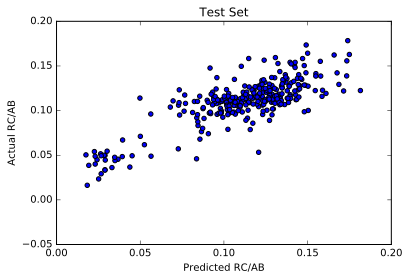

In [10]:
plt.scatter(Ytest, preds_test)
plt.title("Test Set")
plt.xlabel("Predicted RC/AB")
plt.ylabel("Actual RC/AB")

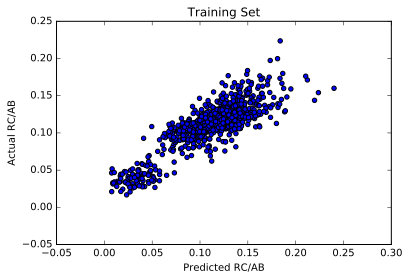

In [11]:
plt.scatter(Ytrain, preds_train)
plt.title("Training Set")
plt.xlabel("Predicted RC/AB")
plt.ylabel("Actual RC/AB")

In [12]:
#Get R2 scores for each set
print("Training R2:")
print(MLP.score(Xtrain, Ytrain))
print("\n")
print("Test R2:")
print(MLP.score(Xtest, Ytest))

Training R2:
0.728612630113


Test R2:
0.664676787612


In [13]:
#Now let's try grid-search for regularization

MLP.get_params()

{'activation': 'relu',
 'alpha': 1,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (18, 6),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1234,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
param_dict = {"alpha" : param_grid}

clf = GridSearchCV(MLP_for_grid, param_dict, return_train_score=True, scoring='r2')
clf.fit(X, y)

clf.cv_results_

{'mean_fit_time': array([ 0.01630171,  0.01179632,  0.01248662,  0.01105316,  0.01082969,
         0.12071594,  0.09328826,  0.06001504]),
 'mean_score_time': array([ 0.00050894,  0.00049599,  0.00043495,  0.0003593 ,  0.00033991,
         0.00039593,  0.00038616,  0.00034507]),
 'mean_test_score': array([-0.00586627, -0.00586626, -0.00586614, -0.00586496, -0.00585426,
         0.70124476,  0.62955217,  0.34744181]),
 'mean_train_score': array([ -2.81256500e-15,  -2.85253302e-13,  -2.85110454e-11,
         -2.82946141e-09,  -2.61777804e-07,   7.19097059e-01,
          6.39200915e-01,   3.50696286e-01]),
 'param_alpha': masked_array(data = [1e-05 0.0001 0.001 0.01 0.1 1 10 100],
              mask = [False False False False False False False False],
        fill_value = ?),
 'params': [{'alpha': 1e-05},
  {'alpha': 0.0001},
  {'alpha': 0.001},
  {'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10},
  {'alpha': 100}],
 'rank_test_score': array([8, 7, 6, 5, 4, 1, 2, 3], dtyp

In [15]:
clf.best_score_

0.70124475810841624

In [16]:
#Now, try Decision Tree Classifier

from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(max_depth = 4, min_samples_leaf = 4, random_state=1234)
DTR.fit(Xtrain, Ytrain)
tree_pred_train = DTR.predict(Xtrain)

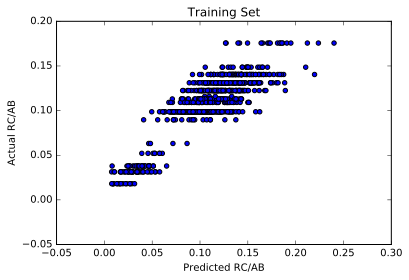

In [17]:
plt.scatter(Ytrain, tree_pred_train)
plt.title("Training Set")
plt.xlabel("Predicted RC/AB")
plt.ylabel("Actual RC/AB")

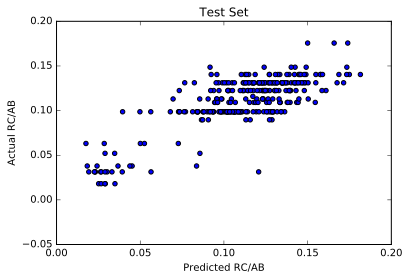

In [18]:
tree_pred_test = DTR.predict(Xtest)

plt.scatter(Ytest, tree_pred_test)
plt.title("Test Set")
plt.xlabel("Predicted RC/AB")
plt.ylabel("Actual RC/AB")

In [19]:
#Get R2 scores for each set
print("Training R2:")
print(DTR.score(Xtrain, Ytrain))
print("\n")
print("Test R2:")
print(DTR.score(Xtest, Ytest))

Training R2:
0.738301525506


Test R2:
0.625035477755


In [20]:
DTR_2 = DecisionTreeRegressor(random_state=1234)
mx_dpth = [2, 3, 4, 5, 6, 7]
mn_lf_splt = [1, 2, 3, 4]
param_dict_rf = {'max_depth': mx_dpth, 'min_samples_leaf' : mn_lf_splt}
clf_rf = GridSearchCV(DTR_2, param_dict_rf, return_train_score=True, scoring='r2')

In [21]:
clf_rf.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=0)

In [22]:
clf_rf.cv_results_

{'mean_fit_time': array([ 0.00370836,  0.00210396,  0.00197872,  0.0018386 ,  0.00278926,
         0.00284195,  0.00282272,  0.00240517,  0.00303801,  0.0030725 ,
         0.00307798,  0.00296434,  0.00372108,  0.00370725,  0.00372903,
         0.00370057,  0.00443204,  0.00434645,  0.00425259,  0.00432531,
         0.0052619 ,  0.00511901,  0.00505479,  0.00513562]),
 'mean_score_time': array([ 0.00076826,  0.00042256,  0.00044751,  0.00038592,  0.00035135,
         0.00042176,  0.00043035,  0.00036836,  0.00031948,  0.00035501,
         0.00031789,  0.00026464,  0.00032576,  0.00029548,  0.0004034 ,
         0.00031018,  0.00031273,  0.00033379,  0.00028475,  0.00030541,
         0.00031988,  0.00031185,  0.00033728,  0.00031694]),
 'mean_test_score': array([ 0.62641687,  0.62641687,  0.62641687,  0.62641687,  0.65070563,
         0.65270412,  0.65270412,  0.65557149,  0.65409247,  0.65625003,
         0.65970333,  0.66213716,  0.63399398,  0.63636868,  0.64273756,
         0.6502048

In [23]:
clf_rf.best_params_

{'max_depth': 4, 'min_samples_leaf': 4}

In [41]:
from sklearn.svm import SVR

svr = SVR(kernel = 'rbf')

In [54]:
#Cval = [0.01, 0.1, 1]
#eps = [0.01, 0.1, 1]
Cval = [0.01, 0.1, 1, 10]
eps = [0.001, 0.01, 0.1]
gamma = [0.0001, 0.00001, 0.000001, 0.0000001]
svm_dict = {'C': Cval, 'epsilon' : eps, 'gamma' : gamma}
clf_svm = GridSearchCV(svr, svm_dict, return_train_score=True, scoring='r2')
clf_svm.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': [0.0001, 1e-05, 1e-06, 1e-07], 'epsilon': [0.001, 0.01, 0.1], 'C': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=0)

In [55]:
clf_svm.best_score_

0.72347441335322138

In [56]:
clf_svm.cv_results_

{'mean_fit_time': array([  6.13125960e-02,   5.41814168e-02,   5.03202279e-02,
          5.05611102e-02,   3.75898679e-02,   3.43459447e-02,
          3.31154664e-02,   3.61979802e-02,   8.45829646e-04,
          6.21954600e-04,   4.19537226e-04,   4.95115916e-04,
          8.32026800e-02,   7.78896014e-02,   5.99346161e-02,
          5.83517551e-02,   5.08281390e-02,   5.33099969e-02,
          3.89065742e-02,   3.53900592e-02,   7.91629155e-04,
          5.73158264e-04,   5.02586365e-04,   4.21524048e-04,
          1.22084061e-01,   1.90499385e-01,   9.91366704e-02,
          7.17008909e-02,   6.77827994e-02,   1.04788224e-01,
          6.49657249e-02,   5.08851210e-02,   7.80264537e-04,
          5.67992528e-04,   4.14053599e-04,   4.41869100e-04,
          1.94235643e-01,   7.42412170e-01,   3.34818522e-01,
          1.39160395e-01,   7.42067496e-02,   3.13837926e-01,
          2.30839968e-01,   1.02811019e-01,   7.93615977e-04,
          7.55866369e-04,   4.87327576e-04,   4.06901

In [53]:
clf_svm.best_params_

{'C': 1, 'epsilon': 0.01, 'gamma': 1e-06}